1. Cargando datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Extraer datos
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Investigación sobre los datos

In [4]:
# ¿En qué columnas se distribuyen los datos?
train.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# ¿Qué tamaño tienen los datos?
train.shape

(891, 12)

In [6]:
# ¿Existen valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# ¿Cómo están distribuidas las variables numéricas?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# ¿Cuál es el comportamiento de las variables categóricas?
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


2.1 Estudio de la variable target

In [9]:
train.groupby(["Survived"]).count()["PassengerId"]

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [10]:
#target vs sex
train.groupby(["Survived", "Sex"]).count()["PassengerId"]

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Sex'>

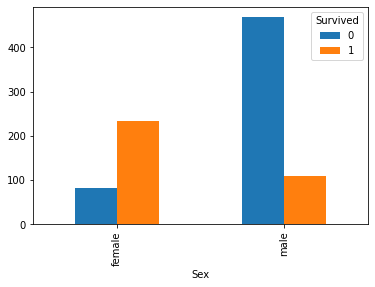

In [11]:
grouped_sex =train.groupby(["Survived", "Sex"]).count()["PassengerId"]
(grouped_sex.unstack(level=0).plot.bar())

In [12]:
# Relación entre el sexo y la supervivencia
train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


AxesSubplot(0.125,0.125;0.775x0.755)


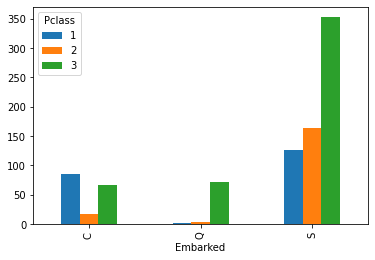

In [13]:
# gráfica que muestra la relación entre la clase y el puerto de embarque
print(train.groupby(["Pclass", "Embarked"]).count()["PassengerId"].unstack(level=0).plot.bar())

In [14]:
# Relación entre la clase y la supervivencia
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


3. Procesamiento de datos

Lo primero es selecionar las variables con las que se va a trabajar:
- Survived
- Sex
- Age
- Pclass

In [15]:
train[["Survived", "Sex", "Age", "Pclass"]].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


Estudio de datos nulos:

In [16]:
train[["Survived", "Sex", "Age", "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Conclusiones de los datos extraidos:
- Hay que modificar los datos que faltan en Age train["Age"].isna()
- La variable Sex aparece como object y tendría que ser int o float para poder emplear algoritmos

In [17]:
# 1: Mirar cómo están distribuidos los datos nulos en Age

(train[train["Age"].isna()].groupby(["Sex", "Pclass"]).count()["PassengerId"].unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [18]:
# Parientes de las personas que no reportaron su edad
(train[train["Age"].isna()].groupby(["SibSp", "Parch"]).count()["PassengerId"].unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


Conclusiones:
- Los datos que faltan son mayoritariamente de gente que viajaba en 3ª clase y sola
- Más adelante habrá que crear una variable que indique si una persona viajaba sola o en compañía

In [19]:
# Cálculo de la media de edad
train["Age"].mean()

29.69911764705882

In [20]:
# Imputar la media para no tener valores nulos
train["Age"]=train["Age"].fillna(29.36158249158249)
train[["Survived", "Sex", "Age", "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


De esta forma ya no hay datos nulos.
Imputar la media de edad en este caso (29.36158249158249 años) puede resultar una buena solución, ya que se corresponde con el valor central que tienen los hombres, pasajeros, de tercera clase.
Es importante elegir un buen dato para imputar y rellenar los valores nulos, porque este dato va a contribuir a la generación de conclusiones y resultados. Si se emplea un valor subjetivo o sesgado, las conclusiones y los resultados extraídos también estarían sesgados.

In [21]:
# Cambio del object por un número entero
# Utilizando map para label encoding
train["Sex"]=train["Sex"].map({"female":1, "male":0}).astype(int)

In [22]:
train[["Survived", "Sex", "Age", "Pclass"]].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


3.1 Creación de nuevas variables

In [23]:
# Creación de la variable para la gente que viaja sola
train["FlagSolo"]=np.where((train["SibSp"]==0)&(train["Parch"]==0),1,0)

Para saber la gente que viaja sola se emplea una variable 0,1 que indica si se cumple o no la condición. En este caso, se trata de analizar el grado de supervivencia de los pasajeros que viajan solos.
Al tratarse de una variable 0,1 hay que establecer: 0 para los que no sobreviven y 1 para los que sobreviven.

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


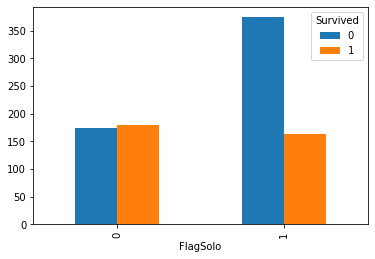

In [24]:
grouped_flag=train.groupby(["Survived","FlagSolo"]).count()["PassengerId"]
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

En la gráfica se puede apreciar de forma visual que, cuando el pasajero no viaja solo, el número de pasajeros que sobrevivieron y los que no es más o menos la misma (175 y 179).

Sin embargo, en relación a los pasajeros que viajan solos, vemos que se aprecia una gran diferencia en la supervivencia, habiendo casi el doble de pasajeros que fallecieron con respcto a los que lograron sobrevivir (374 y 163)

In [25]:
train[["Survived", "Sex", "Age", "Pclass", "FlagSolo"]].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Los datos que se pretenden analizar son: 
- La supervivencia (0,1)
- El sexo (0,1)
- La edad
- La clase (1,2,3)
- Si viajaban solos o acompañados (0,1)

In [26]:
# Variable dependiente
Y_train=train["Survived"]

# Variables independientes
features=["Sex","Age","Pclass", "FlagSolo"]
X_train=train[features]

print(Y_train.shape,X_train.shape)

(891,) (891, 4)


4. Los modelos

Los modelos que se van a analizar son:
- Regresión logística
- Árboles de decisión

In [27]:
# Modelo de regresión logística
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

A través de los modelos de regresión logística se puede establecer con precisión cuál es la relación que existe entre una variable dependiente (no métrica) y un conjunto de variables independientes (que pueden ser métricas o no métricas).

La principal diferencia entre la regresión logística y la regresión lineal múltiple pasa porque en la regresión logística se analizan variables dependientes métricas, es decir, la relación entre los valores se mide en intervalos o escalas de razón. Por tanto, la diferencia entre los valores que se analizan será constante a lo largo de toda la escala.

En el modelo de regresión logística, la variable dependiente es discreta, por lo que los valores que toma están entre 0 y 1. Por otro lado, como ya hemos señalado, las variables independientes pueden ser métricas o no métricas, es decir, cualitativas o cuantitativas. En cuanto a la ecuación que genera el modelo estadístico, no se trata de una función lineal, sino exponencial. Sin embargo, lo habitual es transformarla logarítmicamente para que se presente como una función lineal.

Esta transformación permite, en la práctica, que el modelo arroje únicamente determinados resultados:
- 1 
- 0

La utilidad de analizar este modelo en este caso concreto se explica teniendo en consideración que, a través de los resultados que puede arrojar, se pueden estudiar multitud de fenómenos. Además, permite estudiar variables tanto cualitativas como cuantitativas a través de una única ecuación conjunta.

In [28]:
# Modelo de árboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

En segundo lugar, el modelo de árboles de decisión se puede emplear como un sistema capaz de realiza clasificaciones para establecer las diferentes predicciones de comportamiento de las variables a analizar basandose en un conjunto de reglas de decisión.

El modelo de árboles de decisión presenta muchas ventajas a la hora de analizar un conjunto de datos, ya que resulta fácilmente interpretable el criterio (lógica interna) que se ha seguido para extraer conclusiones o resultados cuando se está visualizando el árbol de decisión. Por otro lado, el modelo de árboles de decisión únicamente tiene en consideración las características que resultan útiles para analizar un modelo, omitiendo el resto. De esta forma se reduce de forma cuantiosa el estudio, ya que se está realizando una limitación estricta a las áreas a las que se dirige cada investigación.

5. Evaluación

Matriz de confusión para evaluar cada modelo.

Una matriz de confusión o de error es una tabla-resumen en la que se presentan los resultados tras haber evaluado el rendimiento de un determinado modelo, en este caso los modelos de regresión logística y el de árbol de decisión.

La forma en la que se presentan los resultados es a través de una tabla 2x2 en la que se recogen el número de predicciones y se ponen en relación con los valores de conteo, desglosando cada una de las clases.

Por tanto, la estructura que sigue esta matriz es la siguiente:
- Positivo, se representa con una P. Esta primera variable representa aquellas observaciones que son positivas.
- Negativo, se representa con una N. Esta segunda variable representa aquellas observaciones que son no positivos.
- Verdadero Positivo, se representa como TP (true positive). El verdadero positivo se encuentra en el primer cuadrante de la matriz y se compone por todos aquellos resultados que el modelo predice de forma correcta como observaciones positivas.
- Verdadero Negativo, se representa como TN (true negative). El verdadero negativo se encuentra en el segundo cuadrante de la matriz y se compone por todos aquellos resultados que el modelo predice de forma correcta como observaciones no positivas.
- Falso Positivo, se representa como FP (false positive). El falso positivo, o error de tipo 1, se compone por todos aquellos resultados en los que el modelo ha interpretado de forma incorrecta la clase positiva. Es decir, representa el margen de error de la matriz en cuanto a la parte positiva, ya que establece cuántas veces el modelo ha interpretado una observación como positiva cuando era no positiva.
- Falso Negativo, se representac como FN (false negative). El falso negativo, o error de tipo 2, se compone por todos aquellos resultados en los que el modelo ha interpretado de forma incorrecta la clase no positiva. Es decir, representa el margen de error de la matriz en cuanto a la parte no positiva, ya que establece cuántas veces el modelo ha interpretado una observación como no positiva cuando era positiva.

Por tanto, la matriz de confusión es una tabla en la que se van a presentar los valores reales (en nuestro caso, si un pasajero sobrevivió o no) y los valores predichos (qué resultados arroja el modelo).

De esta forma se puede establecer una comparativa entre los datos reales sobre lo que sucedió en el caso de análisis concreto (en nuestro caso, la gente que sobrevivió al hundimiento del Titanic) y los datos que el modelo de confusión es capaz de predecir en base a la información que se le va a aportar.

In [29]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc (modelo):
    disp=plot_confusion_matrix(modelo,X_train,Y_train,cmap=plt.cm.Blues, values_format="d")
    true_pred=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data=np.sum(disp.confusion_matrix)
    accuracy=true_pred/total_data
    print("Precisión: ", np.round(accuracy,2))
    plt.show()

Precisión:  0.8


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


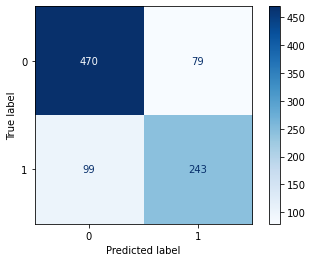

In [30]:
conf_mat_acc(logreg)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precisión:  0.9


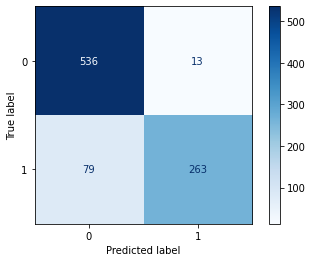

In [31]:
conf_mat_acc(decision_tree)

5.1 Evaluación sobre la prueba

Hasta ahora se han empleado como datos para el análisis los que vienen como datos de entrenamiento (train set), lo que puede llevar a evaluaciones sesgadas, ya que se estan empleando los mismos datos que contienen las respuestas que se quieren obtener del estudio. Esto significa que, al emplear los datos de entrenamiento, los errores extraídos estarían sesgados, por lo que sería dificil poder aportar una visión general y extenderla a casos que no se incluyan en el modelo.

Por tanto, vamos a emplear ahora los datos de prueba (test set).

La lógica de que Kaggle presente los datos de prueba y de evaluación es sencilla: los datos que aporta el train se emplean para generar los modelos que se pretenden analizar en cada caso y, posteriormmente, los datos del test se utilizan para verificar los resultados que el modelo no ha tenido en cuenta y que, sin embargo, deben tenerse en consideración para realizar la clasificación final.

In [32]:
# Datos del test set

print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [33]:
# Procesamiento de los datos del test set

# En primer lugar: realizar el cambio de object a int en el campo del sexo de los pasajeros para poder trabajar con esa variable.
test["Sex"]=test["Sex"].map({"female":1,"male":0}).astype(int)

# En segundo lugar: rellenar los datos nulos de la edad con el dato que previamente habíamos calculado (en este caso, la media)
test["Age"]=test["Age"].fillna(29.36158249158249)

# En tercer lugar: crear la misma variable que creamos para el train set en la que se recoja la cantidad de pasajeros que viajaban solos a través de la variable "FlagSolo"
test["FlagSolo"]=np.where((test["SibSp"]==0)&(test["Parch"]==0),1,0)

In [34]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [35]:
# Creación del test set
X_test=test[features]
print(X_test.shape)

(418, 4)


De esta forma se puede ver que contamos con 418 registros para hacer las predicciones

In [36]:
# Predicción de la cantidad de gente que ha sobrevivido empleando los datos del test set

Y_pred_log=logreg.predict(X_test)
Y_pred_tree=decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


Estas predicciones extraídas son las que se van a comparar en Kaggle con los datos reales. La utilidad de realizar estas comparaciones pasa por conocer cuáles son los mejores modelos para establecer predicciones y conocer resultados, ya que esta será la forma más adecuada para poder elegir un modelo de análisis.

Sin embargo, en este punto no se conocen los datos reales, ya que Kaggle no da acceso a los mismos. 

6. Predicción

En este punto vamos  arealizar una predicción sobre los datos del test set.

In [37]:
# Predicción sobre el test set
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


Para poder conocer el error de predicción que tiene el modelo es necesario descargar los datos extraídos hasta ahora.

Por tanto, hay que exportar el notebook a csv y enviarselo a Kaggle para que establezca cuál es el error que tienen los datos y poder saber así si el modelo es adecuado para este estudio o no. 

En este caso, tenemos como modelos el de regresión logística y el árbol de decisión

In [38]:
def download_output(Y_pred,name):
    output=pd.DataFrame({"PassengerId": test.PassengerId, "Survived":Y_pred})
    output.to_csv(name, index=False)

In [39]:
download_output(Y_pred_log, "Cristina_pred_log.csv")
download_output(Y_pred_tree, "Cristina_pred_tree.csv")